In [2]:
from PIL import Image

# Create a 160x120 image with 9-bit color (3 bits R, 3 bits G, 3 bits B)
width, height = 160, 120
image = Image.new("RGB", (width, height))

# Generate 9-bit color pattern (3 bits per channel, scaled to 8-bit RGB)
for x in range(width):
    for y in range(height):
        # Simulate 3-bit values for R, G, B (values from 0 to 7)
        r_3bit = (x * 8) // width      # 0–7
        g_3bit = (y * 8) // height     # 0–7
        b_3bit = ((x + y) * 4) // (width + height)  # 0–7

        # Scale 3-bit values to 8-bit (0–255)
        r = int((r_3bit / 7) * 255)
        g = int((g_3bit / 7) * 255)
        b = int((b_3bit / 7) * 255)

        image.putpixel((x, y), (r, g, b))

# Save as 24-bit BMP
output_path_9bit_color = "9bit_color_24bitbmp_160x120.bmp"
image.save(output_path_9bit_color, "BMP")

output_path_9bit_color


'9bit_color_24bitbmp_160x120.bmp'

In [3]:
from PIL import Image
import numpy as np

# Parameters
width, height = 160, 120
mif_depth = width * height  # total pixels
mif_width = 9               # 9-bit color

# Simulate a 9-bit color image (3 bits per channel)
data = []
for y in range(height):
    for x in range(width):
        r = (x * 8) // width      # 0-7
        g = (y * 8) // height     # 0-7
        b = ((x + y) * 4) // (width + height)  # 0-7
        pixel_9bit = (r << 6) | (g << 3) | b   # RRR GGG BBB packed
        data.append(pixel_9bit)

# Generate MIF content
mif_lines = [
    f"DEPTH = {mif_depth};",
    f"WIDTH = {mif_width};",
    "ADDRESS_RADIX = HEX;",
    "DATA_RADIX = BIN;",
    "CONTENT",
    "BEGIN"
]

for addr, value in enumerate(data):
    mif_lines.append(f"{addr:X} : {value:09b};")

mif_lines.append("END;")

# Save to file
mif_path = "9bit_color_image_160x120.mif"
with open(mif_path, "w") as f:
    f.write("\n".join(mif_lines))

mif_path


'9bit_color_image_160x120.mif'

In [4]:
from PIL import Image

# Load and resize image
for i in range(10):
    img = Image.open(f"digit_{i}.bmp").resize((55, 75))
    img = img.convert("RGB")

    # Parameters
    width, height = img.size
    depth = width * height
    mif_width = 9
    mif_lines = [
        f"DEPTH = {depth};",
        f"WIDTH = {mif_width};",
        "ADDRESS_RADIX = HEX;",
        "DATA_RADIX = BIN;",
        "CONTENT",
        "BEGIN"
    ]

    # Convert to 9-bit color (3 bits per channel)
    address = 0
    for y in range(height):
        for x in range(width):
            r, g, b = img.getpixel((x, y))
            r3 = r >> 5  # 3 MSBs of 8-bit value
            g3 = g >> 5
            b3 = b >> 5
            color9 = (r3 << 6) | (g3 << 3) | b3
            mif_lines.append(f"{address:X} : {color9:09b};")
            address += 1

    mif_lines.append("END;")

    # Save .mif file
    with open(f"digit_{i}.mif", "w") as f:
        f.write("\n".join(mif_lines))


In [27]:
img = Image.open(f"digits_sprite_sheet.bmp").resize((55*10//2, 75//2))
img = img.convert("RGB")

# Parameters
width, height = img.size
depth = width * height
mif_width = 9
mif_lines = [
    f"DEPTH = {depth};",
    f"WIDTH = {mif_width};",
    "ADDRESS_RADIX = HEX;",
    "DATA_RADIX = BIN;",
    "CONTENT",
    "BEGIN"
]

# Convert to 9-bit color (3 bits per channel)
address = 0
for y in range(height):
    for x in range(width):
        r, g, b = img.getpixel((x, y))
        r3 = r >> 5  # 3 MSBs of 8-bit value
        g3 = g >> 5
        b3 = b >> 5
        color9 = (r3 << 6) | (g3 << 3) | b3
        mif_lines.append(f"{address:X} : {color9:09b};")
        address += 1

mif_lines.append("END;")

# Save .mif file
with open(f"digits_sprite_sheet.mif", "w") as f:
    f.write("\n".join(mif_lines))

27


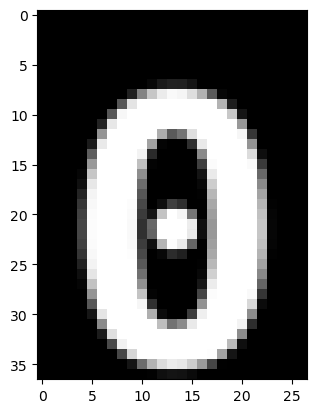

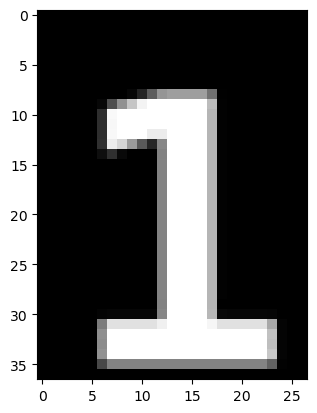

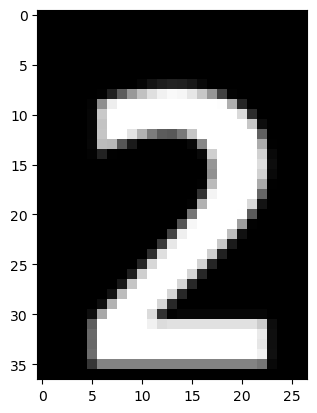

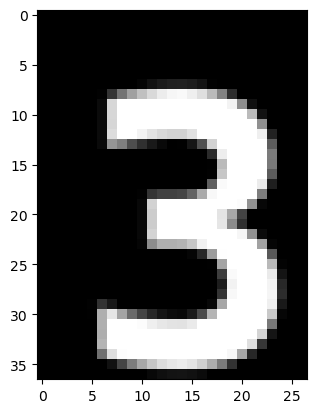

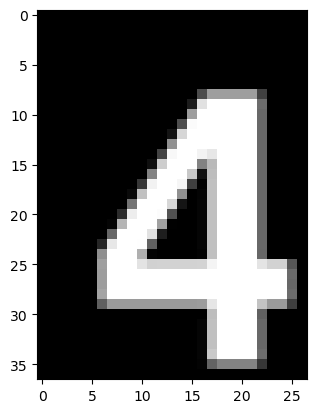

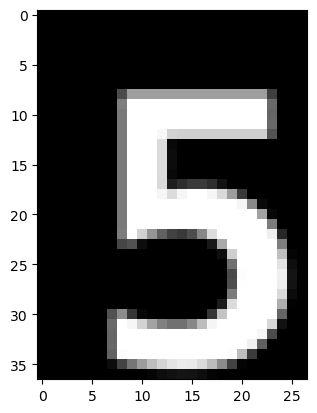

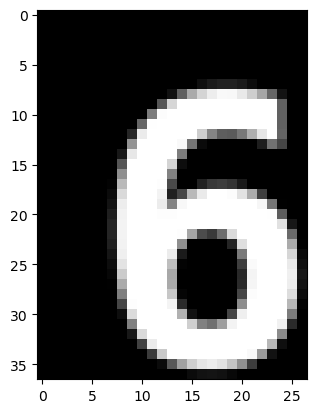

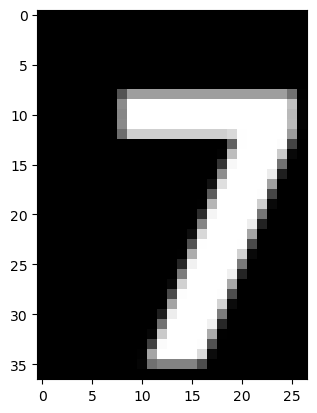

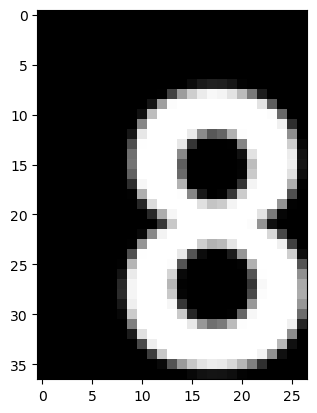

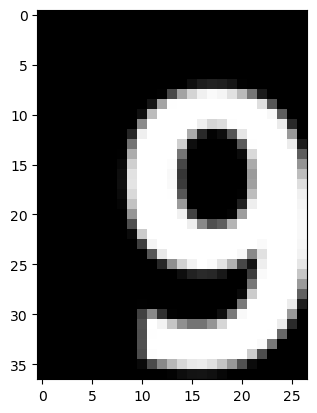

In [31]:
import matplotlib.pyplot as plt
import numpy as np
np_img = np.array(img)
plt.imshow(np_img[:, :25])

dist = 27
print(dist)
for i in range(10):
    plt.imshow(np_img[:, i*dist:(i+1)*dist])
    plt.show()